In [29]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [30]:
#load the data
data = np.genfromtxt('gambling.csv',delimiter=',', names=True, dtype=None, encoding="utf")

In [3]:
data

array([(  0, 0, 'PUNISH', 577. , 348. , 0.6875, 0., 0.3125),
       (  0, 0, 'REWARD', 602. , 575. , 0.5625, 0., 0.4375),
       (  0, 1, 'PUNISH', 726.5, 807.5, 0.5   , 0., 0.5   ), ...,
       (338, 0, 'REWARD', 260. , 223. , 0.5625, 0., 0.4375),
       (338, 1, 'PUNISH', 318. , 227. , 0.3125, 0., 0.6875),
       (338, 1, 'REWARD', 397. , 360. , 0.5625, 0., 0.4375)],
      dtype=[('Subject', '<i8'), ('Run', '<i8'), ('ConditionName', '<U6'), ('MEDIAN_RT_LARGER', '<f8'), ('MEDIAN_RT_SMALLER', '<f8'), ('PROP_LARGER', '<f8'), ('PROP_NLR', '<f8'), ('PROP_SMALLER', '<f8')])

In [4]:
data[-1]

(338, 1, 'REWARD', 397., 360., 0.5625, 0., 0.4375)

In [5]:
print(data)

[(  0, 0, 'PUNISH', 577. , 348. , 0.6875, 0., 0.3125)
 (  0, 0, 'REWARD', 602. , 575. , 0.5625, 0., 0.4375)
 (  0, 1, 'PUNISH', 726.5, 807.5, 0.5   , 0., 0.5   ) ...
 (338, 0, 'REWARD', 260. , 223. , 0.5625, 0., 0.4375)
 (338, 1, 'PUNISH', 318. , 227. , 0.3125, 0., 0.6875)
 (338, 1, 'REWARD', 397. , 360. , 0.5625, 0., 0.4375)]


In [6]:
data.shape

(1356,)

In [7]:
df = pd.read_csv('gambling.csv')

In [8]:
df.head(10)

,Subject,Run,ConditionName,MEDIAN_RT_LARGER,MEDIAN_RT_SMALLER,PROP_LARGER,PROP_NLR,PROP_SMALLER
0,0,0,PUNISH,577.0,348.0,0.687500,0.0,0.312500
1,0,0,REWARD,602.0,575.0,0.562500,0.0,0.437500
2,0,1,PUNISH,726.5,807.5,0.500000,0.0,0.500000
3,0,1,REWARD,638.0,640.5,0.500000,0.0,0.500000
4,1,0,PUNISH,217.0,232.0,0.312500,0.0,0.687500
5,1,0,REWARD,259.0,262.0,0.687500,0.0,0.312500
6,1,1,PUNISH,226.0,215.0,0.687500,0.0,0.312500
7,1,1,REWARD,246.0,314.5,0.333333,0.0,0.666667
8,2,0,PUNISH,392.0,475.0,0.562500,0.0,0.437500
9,2,0,REWARD,413.0,395.0,0.437500,0.0,0.562500


In [9]:
df.shape

(1356, 8)

In [10]:
df['PROP_NLR'].value_counts()

0.0    1356
Name: PROP_NLR, dtype: int64

In [11]:
# Drop PROP_NLR and PROP_SMALLER Column
df.drop(columns=['PROP_NLR','PROP_SMALLER','Subject','Run','ConditionName'], axis=1, inplace=True)

In [12]:
df.head()

,MEDIAN_RT_LARGER,MEDIAN_RT_SMALLER,PROP_LARGER
0,577.0,348.0,0.6875
1,602.0,575.0,0.5625
2,726.5,807.5,0.5000
3,638.0,640.5,0.5000
4,217.0,232.0,0.3125


In [13]:
df.isnull().sum()

MEDIAN_RT_LARGER     41
MEDIAN_RT_SMALLER    24
PROP_LARGER           0
dtype: int64

In [14]:
data_array = df.to_numpy()

In [15]:
data_array

array([[5.770e+02, 3.480e+02, 6.875e-01],
       [6.020e+02, 5.750e+02, 5.625e-01],
       [7.265e+02, 8.075e+02, 5.000e-01],
       ...,
       [2.600e+02, 2.230e+02, 5.625e-01],
       [3.180e+02, 2.270e+02, 3.125e-01],
       [3.970e+02, 3.600e+02, 5.625e-01]])

In [16]:
data_array.shape

(1356, 3)

In [17]:
# data_array = np.delete(data_array, (0,1, 2) , axis=1) #remove useless columns

In [18]:
data_array.shape #just checking

(1356, 3)

In [19]:
data_array = data_array.reshape(339,12) #reshaping to one row per subject

In [20]:
data_array.dtype

dtype('float64')

In [21]:
data_array

array([[5.77000000e+02, 3.48000000e+02, 6.87500000e-01, ...,
        6.38000000e+02, 6.40500000e+02, 5.00000000e-01],
       [2.17000000e+02, 2.32000000e+02, 3.12500000e-01, ...,
        2.46000000e+02, 3.14500000e+02, 3.33333333e-01],
       [3.92000000e+02, 4.75000000e+02, 5.62500000e-01, ...,
        4.43500000e+02, 5.40000000e+02, 5.00000000e-01],
       ...,
       [3.29000000e+02, 3.41000000e+02, 4.37500000e-01, ...,
        4.02500000e+02, 4.40000000e+02, 1.25000000e-01],
       [5.63000000e+02, 4.90000000e+02, 4.37500000e-01, ...,
        6.17000000e+02, 6.69000000e+02, 4.37500000e-01],
       [3.00000000e+02, 2.14000000e+02, 6.87500000e-01, ...,
        3.97000000e+02, 3.60000000e+02, 5.62500000e-01]])

In [22]:
data_array.shape

(339, 12)

In [23]:
np.sum(np.isnan(data_array))

65

In [24]:
X = data_array[~np.isnan(data_array).any(axis=1)]

In [25]:
X.shape

(309, 12)

In [26]:
from sklearn.cluster import KMeans

In [27]:
km = KMeans(n_clusters=3, random_state=42, n_jobs=-1)
y = km.fit_predict(X)

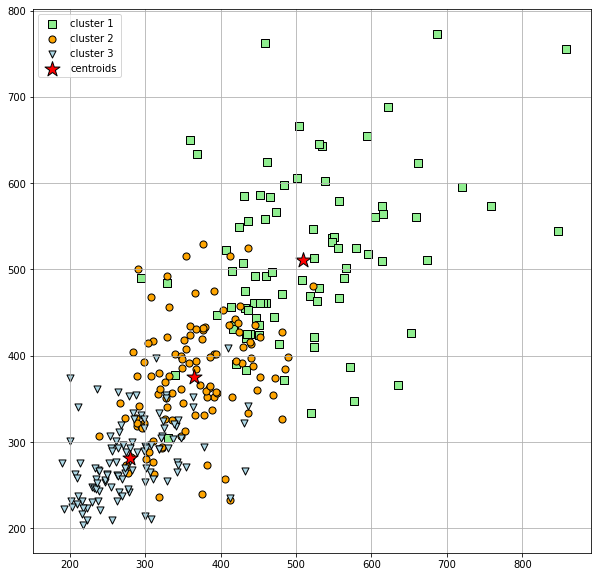

In [39]:
# plot the 3 clusters
plt.figure(figsize=(10,10))
plt.scatter(
    X[y == 0, 0], X[y == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y == 1, 0], X[y == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y == 2, 0], X[y == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

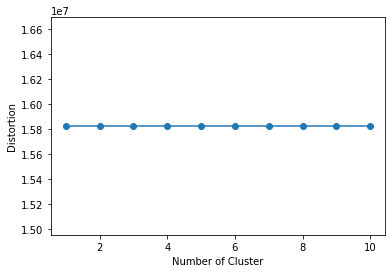

In [40]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=3, random_state=42, n_jobs=-1)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Distortion')
plt.show()

In [219]:
pca = PCA(n_components = 6)
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [220]:
X.shape

(309, 16)

In [221]:
np.sum(pca.explained_variance_ratio_)

0.9567941806959074

In [223]:
plt.plot(pca.explained_variance_ratio_)

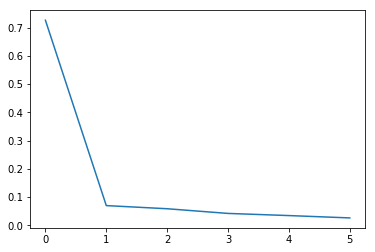

In [224]:
plt.show()

In [225]:
# @title Helper Functions


def plot_variance_explained(variance_explained):
  """
  Plots eigenvalues.

  Args:
    variance_explained (numpy array of floats) : Vector of variance explained
                                                 for each PC

  Returns:
    Nothing.

  """

  plt.figure()
  plt.plot(np.arange(1, len(variance_explained) + 1), variance_explained,
           '--k')
  plt.xlabel('Number of components')
  plt.ylabel('Variance explained')
  plt.show()


def plot_MNIST_reconstruction(X, X_reconstructed):
  """
  Plots 9 images in the MNIST dataset side-by-side with the reconstructed
  images.

  Args:
    X (numpy array of floats)               : Data matrix each column
                                              corresponds to a different
                                              random variable
    X_reconstructed (numpy array of floats) : Data matrix each column
                                              corresponds to a different
                                              random variable

  Returns:
    Nothing.
  """

  plt.figure()
  ax = plt.subplot(121)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.title('Data')
  plt.clim([0, 250])
  ax = plt.subplot(122)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(np.real(X_reconstructed[k, :]), (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.clim([0, 250])
  plt.title('Reconstructed')
  plt.tight_layout()


def plot_MNIST_sample(X):
  """
  Plots 9 images in the MNIST dataset.

  Args:
     X (numpy array of floats) : Data matrix each column corresponds to a
                                 different random variable

  Returns:
    Nothing.

  """

  fig, ax = plt.subplots()
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2+1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim([0, 250])
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()


def plot_MNIST_weights(weights):
  """
  Visualize PCA basis vector weights for MNIST. Red = positive weights,
  blue = negative weights, white = zero weight.

  Args:
     weights (numpy array of floats) : PCA basis vector

  Returns:
     Nothing.
  """

  fig, ax = plt.subplots()
  cmap = plt.cm.get_cmap('seismic')
  plt.imshow(np.real(np.reshape(weights, (28, 28))), cmap=cmap)
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim(-.15, .15)
  plt.colorbar(ticks=[-.15, -.1, -.05, 0, .05, .1, .15])
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()


def add_noise(X, frac_noisy_pixels):
  """
  Randomly corrupts a fraction of the pixels by setting them to random values.

  Args:
     X (numpy array of floats)  : Data matrix
     frac_noisy_pixels (scalar) : Fraction of noisy pixels

  Returns:
     (numpy array of floats)    : Data matrix + noise

  """

  X_noisy = np.reshape(X, (X.shape[0] * X.shape[1]))
  N_noise_ixs = int(X_noisy.shape[0] * frac_noisy_pixels)
  noise_ixs = np.random.choice(X_noisy.shape[0], size=N_noise_ixs,
                               replace=False)
  X_noisy[noise_ixs] = np.random.uniform(0, 255, noise_ixs.shape)
  X_noisy = np.reshape(X_noisy, (X.shape[0], X.shape[1]))

  return X_noisy


def change_of_basis(X, W):
  """
  Projects data onto a new basis.

  Args:
    X (numpy array of floats) : Data matrix each column corresponding to a
                                different random variable
    W (numpy array of floats) : new orthonormal basis columns correspond to
                                basis vectors

  Returns:
    (numpy array of floats)   : Data matrix expressed in new basis
  """

  Y = np.matmul(X, W)

  return Y


def get_sample_cov_matrix(X):
  """
  Returns the sample covariance matrix of data X.

  Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable

  Returns:
    (numpy array of floats)   : Covariance matrix
"""

  X = X - np.mean(X, 0)
  cov_matrix = 1 / X.shape[0] * np.matmul(X.T, X)
  return cov_matrix


def sort_evals_descending(evals, evectors):
  """
  Sorts eigenvalues and eigenvectors in decreasing order. Also aligns first two
  eigenvectors to be in first two quadrants (if 2D).

  Args:
    evals (numpy array of floats)    :   Vector of eigenvalues
    evectors (numpy array of floats) :   Corresponding matrix of eigenvectors
                                         each column corresponds to a different
                                         eigenvalue

  Returns:
    (numpy array of floats)          : Vector of eigenvalues after sorting
    (numpy array of floats)          : Matrix of eigenvectors after sorting
  """

  index = np.flip(np.argsort(evals))
  evals = evals[index]
  evectors = evectors[:, index]
  if evals.shape[0] == 2:
    if np.arccos(np.matmul(evectors[:, 0],
                           1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
      evectors[:, 0] = -evectors[:, 0]
    if np.arccos(np.matmul(evectors[:, 1],
                           1 / np.sqrt(2)*np.array([-1, 1]))) > np.pi / 2:
      evectors[:, 1] = -evectors[:, 1]

  return evals, evectors


def pca(X):
  """
  Performs PCA on multivariate data. Eigenvalues are sorted in decreasing order

  Args:
     X (numpy array of floats) :   Data matrix each column corresponds to a
                                   different random variable

  Returns:
    (numpy array of floats)    : Data projected onto the new basis
    (numpy array of floats)    : Vector of eigenvalues
    (numpy array of floats)    : Corresponding matrix of eigenvectors

  """

  X = X - np.mean(X, 0)
  cov_matrix = get_sample_cov_matrix(X)
  evals, evectors = np.linalg.eigh(cov_matrix)
  evals, evectors = sort_evals_descending(evals, evectors)
  score = change_of_basis(X, evectors)

  return score, evectors, evals


def plot_eigenvalues(evals, limit=True):
  """
  Plots eigenvalues.

  Args:
     (numpy array of floats) : Vector of eigenvalues

  Returns:
    Nothing.

  """

  plt.figure()
  plt.plot(np.arange(1, len(evals) + 1), evals, 'o-k')
  plt.xlabel('Component')
  plt.ylabel('Eigenvalue')
  plt.title('Scree plot')
  if limit:
    plt.show()

In [226]:
score, evectors, evals = pca(X)

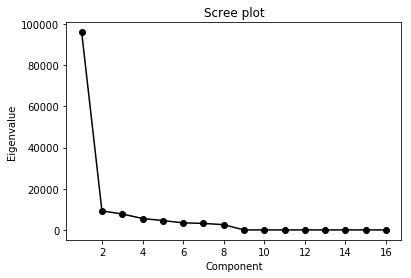

In [227]:
plot_eigenvalues(evals)

In [228]:
help(PCA)

Help on class PCA in module sklearn.decomposition.pca:

class PCA(sklearn.decomposition.base._BasePCA)
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, float, None or string
 |      Number of components to keep.
 |      if n_components is not set all components are kept::
 |  
 |          n_components == min(n_samples, n

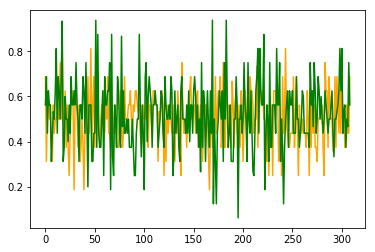

0.5014235629526795
0.518934113351589


In [237]:
plt.plot(X[:,2], color = 'orange', label= 'prop_larger')
plt.plot(X[:,6], color = 'green')
plt.show()
print(np.mean(X[:,2]))
print(np.mean(X[:,6]))

In [238]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi